In [2]:
# Manipulaci√≥n de datos
import pandas as pd
import numpy as np

# Visualizaci√≥n
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones para mostrar gr√°ficas correctamente
%matplotlib inline
sns.set(style="whitegrid", palette="muted")

In [3]:
# Cambia el nombre si tu archivo tiene otro
df = pd.read_csv("C:/Users/mariu/Downloads/Credit_Risk_Insights_Bank/data/CreditScoreClassificationDataset.csv")

# Ver primeras filas
df.head()


Age  Gender  Income            Education Marital Status  \
0   25  Female   50000    Bachelor's Degree         Single   
1   30    Male  100000      Master's Degree        Married   
2   35  Female   75000            Doctorate        Married   
3   40    Male  125000  High School Diploma         Single   
4   45  Female  100000    Bachelor's Degree        Married   

   Number of Children Home Ownership Credit Score  
0                   0         Rented         High  
1                   2          Owned         High  
2                   1          Owned         High  
3                   0          Owned         High  
4                   3          Owned         High

In [4]:
# Dimensiones del dataset
print("Filas y columnas:", df.shape)

# Nombres y tipos de columnas
df.info()

# Ver si hay valores nulos
df.isnull().sum()


Filas y columnas: (164, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [5]:
# Estad√≠sticas de variables num√©ricas
df.describe()

Age         Income  Number of Children
count  164.000000     164.000000          164.000000
mean    37.975610   83765.243902            0.652439
std      8.477289   32457.306728            0.883346
min     25.000000   25000.000000            0.000000
25%     30.750000   57500.000000            0.000000
50%     37.000000   83750.000000            0.000000
75%     45.000000  105000.000000            1.000000
max     53.000000  162500.000000            3.000000

In [6]:
# Distribuci√≥n de variables categ√≥ricas
df.select_dtypes(include='object').nunique()


Gender            2
Education         5
Marital Status    2
Home Ownership    2
Credit Score      3
dtype: int64

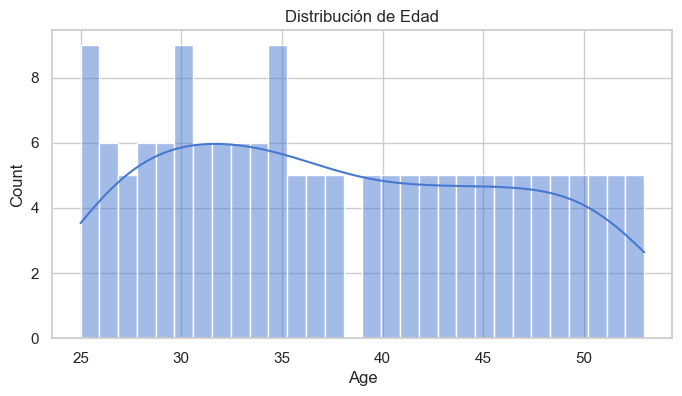

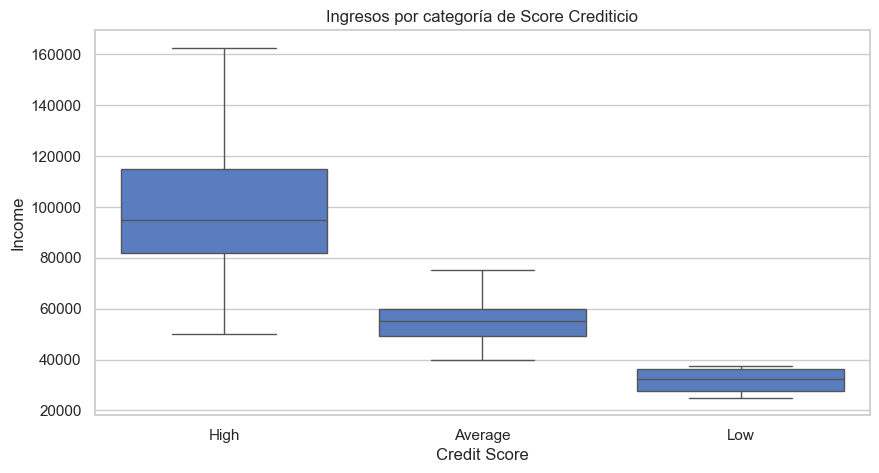

In [7]:
# Histograma de edades
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Distribuci√≥n de Edad")
plt.show()

# Comparar ingresos por score de cr√©dito (si est√° disponible)
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Credit Score', y='Income')
plt.title("Ingresos por categor√≠a de Score Crediticio")
plt.show()


## An√°lisis de la Distribuci√≥n de Edad
1.  **Eje X (`Age` - Edad):** Representa los rangos de edad. El gr√°fico parece abarcar edades desde aproximadamente 25 hasta 52 a√±os.
2.  **Eje Y (`Count` - Conteo):** Muestra la frecuencia o el n√∫mero de individuos que caen dentro de cada rango de edad.
3.  **Forma de la Distribuci√≥n:**
    * Se observa que hay **picos de frecuencia** en edades m√°s j√≥venes, espec√≠ficamente alrededor de los **25, 30 y 35 a√±os**, donde el conteo es m√°s alto (aproximadamente 9 individuos por bin).
    * A medida que la edad avanza, la frecuencia de individuos parece **disminuir ligeramente** y luego se mantiene m√°s **constante** en un nivel m√°s bajo.
    * Entre los **40 y los 50 a√±os**, el conteo por bin se estabiliza en un nivel inferior, alrededor de 5 individuos.
    * La curva KDE refuerza esta observaci√≥n: asciende a un pico alrededor de los 30-35 a√±os y luego desciende gradualmente y se aplana hacia las edades mayores.
4.  **Distribuci√≥n Bimodal o Multimodal Sugerida:** Aunque no es marcadamente bimodal, la curva KDE y los picos en 25, 30 y 35 a√±os sugieren que podr√≠a haber varias concentraciones de edades dentro del conjunto de datos, en lugar de una distribuci√≥n puramente unimodal y sim√©trica. Hay una concentraci√≥n clara de individuos en la veintena y los treinta, y luego una presencia m√°s uniforme (aunque menor en cantidad) en los cuarenta y principios de los cincuenta.

### Conclusi√≥n Breve:

El conjunto de datos tiene una **mayor concentraci√≥n de individuos j√≥venes**, particularmente en los rangos de edad de 25, 30 y 35 a√±os. A partir de los 40 a√±os, la cantidad de individuos por cada rango de edad se reduce y se mantiene m√°s consistente, lo que indica que hay **menos personas representadas en las edades m√°s avanzadas** en comparaci√≥n con las m√°s j√≥venes.

### An√°lisis de las Categor√≠as de Score Crediticio:

1.  **Categor√≠a 'High' (Alto) de Score Crediticio:**
    * **Ingreso Mediano:** Aproximadamente \$90,000.
    * **Rango de Ingresos (RIC):** El 50% central de las personas en esta categor√≠a tienen ingresos que van aproximadamente desde \$80,000 (Q1) hasta \$115,000 (Q3).
    * **Dispersi√≥n:** Este grupo presenta la mayor dispersi√≥n de ingresos, con un rango que va desde cerca de \$50,000 hasta m√°s de \$160,000. Esto sugiere que, aunque los ingresos son generalmente altos, hay una considerable variabilidad dentro de este segmento.

2.  **Categor√≠a 'Average' (Promedio) de Score Crediticio:**
    * **Ingreso Mediano:** Aproximadamente \$55,000.
    * **Rango de Ingresos (RIC):** El 50% central de las personas en esta categor√≠a tienen ingresos que se sit√∫an aproximadamente entre \$50,000 (Q1) y \$60,000 (Q3).
    * **Dispersi√≥n:** La dispersi√≥n de ingresos es menor en comparaci√≥n con la categor√≠a 'High', oscilando aproximadamente entre \$40,000 y \$75,000.

3.  **Categor√≠a 'Low' (Bajo) de Score Crediticio:**
    * **Ingreso Mediano:** Aproximadamente \$33,000.
    * **Rango de Ingresos (RIC):** El 50% central de las personas en esta categor√≠a tienen ingresos que se encuentran aproximadamente entre \$30,000 (Q1) y \$37,000 (Q3).
    * **Dispersi√≥n:** Este grupo muestra la menor dispersi√≥n de ingresos, con un rango que va desde alrededor de \$25,000 hasta poco menos de \$40,000.

### Conclusiones:

* **Correlaci√≥n Positiva:** Existe una **clara y fuerte correlaci√≥n positiva** entre el puntaje crediticio y el nivel de ingresos. A medida que el puntaje crediticio mejora (de 'Low' a 'Average' a 'High'), el ingreso mediano de los individuos tambi√©n aumenta significativamente.
* **Variabilidad del Ingreso:** La **variabilidad de los ingresos** es notablemente mayor en las categor√≠as de puntaje crediticio m√°s altas. Esto significa que, si bien un puntaje crediticio alto tiende a estar asociado con ingresos m√°s altos, la gama de ingresos dentro de ese grupo es mucho m√°s amplia. En contraste, las personas con puntajes crediticios bajos tienden a tener ingresos consistentemente m√°s bajos y con menor variaci√≥n.
* **Distribuciones Distintas:** Las distribuciones de ingresos para cada categor√≠a de puntaje crediticio son bastante distintas, con una superposici√≥n m√≠nima entre sus rangos intercuart√≠licos, especialmente entre las categor√≠as 'High' y 'Low'. Esto sugiere que el ingreso es un factor diferenciador significativo entre estos grupos de puntaje crediticio.

Este an√°lisis sugiere que el puntaje crediticio podr√≠a ser un buen predictor del nivel de ingresos, o que ambos factores est√°n influenciados por variables socioecon√≥micas subyacentes.

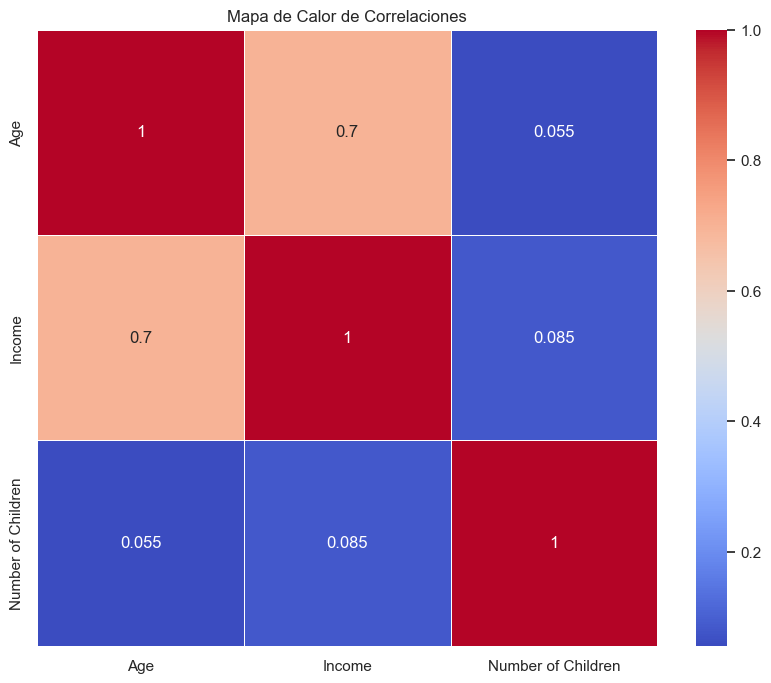

In [8]:
# Correlacion entre variables numericas
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones")
plt.show()


# üî• Interpretaci√≥n del Mapa de Calor de Correlaciones

| Variables          | Correlaci√≥n | Interpretaci√≥n                                                                                                                                                             |
| :----------------- | :---------- | :------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Age vs Income      | 0.70        | üü¢ **Fuerte correlaci√≥n positiva**: A mayor edad, mayor ingreso. Esto tiene sentido l√≥gico, ya que con la edad se gana m√°s experiencia y estabilidad laboral. Es una relaci√≥n interesante para segmentaci√≥n. |
| Age vs Number of Children | 0.055       | üîµ **Correlaci√≥n muy baja / nula**: No hay relaci√≥n significativa entre la edad y la cantidad de hijos en este dataset.                                                         |
| Income vs Number of Children | 0.085       | üîµ **Correlaci√≥n muy baja / nula**: El ingreso no parece depender del n√∫mero de hijos en esta muestra.                                                                 |

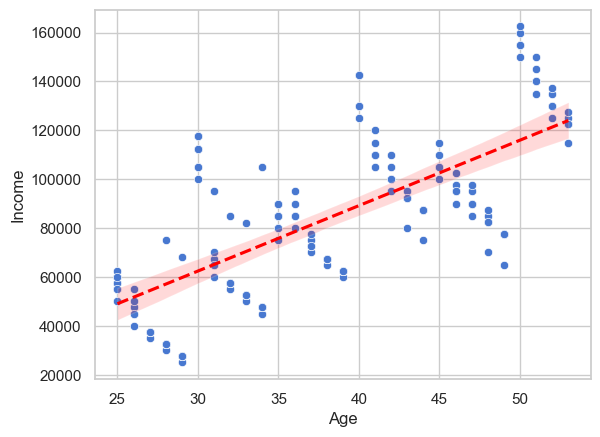

In [11]:
sns.scatterplot(data=df, x='Age', y='Income')
# Agregar la l√≠nea de tendencia (regresi√≥n lineal)
sns.regplot(data=df, x='Age', y='Income', scatter=False, color='red', line_kws={'linestyle':'--'})

# Mostrar el gr√°fico
plt.show()

El gr√°fico de dispersi√≥n muestra claramente una tendencia positiva entre la edad y el ingreso: a medida que la edad aumenta, tambi√©n tiende a aumentar el ingreso. La l√≠nea roja de regresi√≥n lo confirma.

* üî∫ **Tendencia lineal positiva**: lo que valida lo que vimos en el heatmap (correlaci√≥n ‚âà 0.7)
* üîπ **Variabilidad**: hay dispersi√≥n, especialmente entre los 40 y 50 a√±os, lo cual indica que no todos los clientes siguen el mismo patr√≥n.
* üî∏ **Outliers potenciales**: algunos ingresos bajos a edades altas o ingresos muy altos a edades bajas pueden ser clientes at√≠picos.

In [12]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos solo las columnas que usaremos para clusterizar
X = df[['Age', 'Income']]

# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


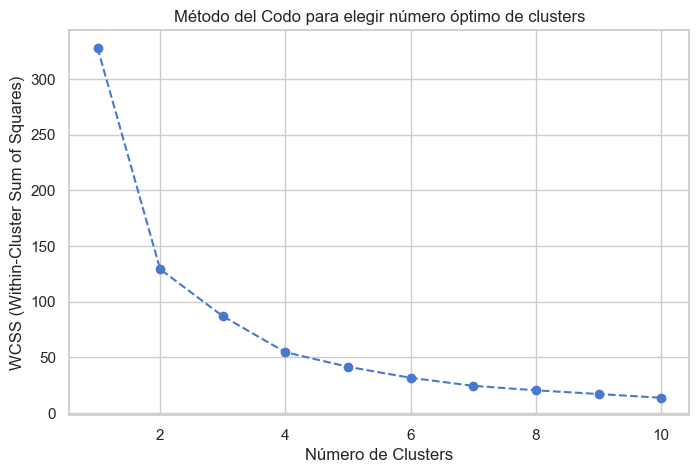

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Lista para guardar WCSS para cada n√∫mero de clusters
wcss = []

# Probar de 1 a 10 clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Graficar el resultado
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('M√©todo del Codo para elegir n√∫mero √≥ptimo de clusters')
plt.xlabel('N√∫mero de Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()


El punto donde el gr√°fico se empieza a ‚Äúaplanar‚Äù es 3.

In [14]:
# Aplicamos KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Segment'] = kmeans.fit_predict(X_scaled)


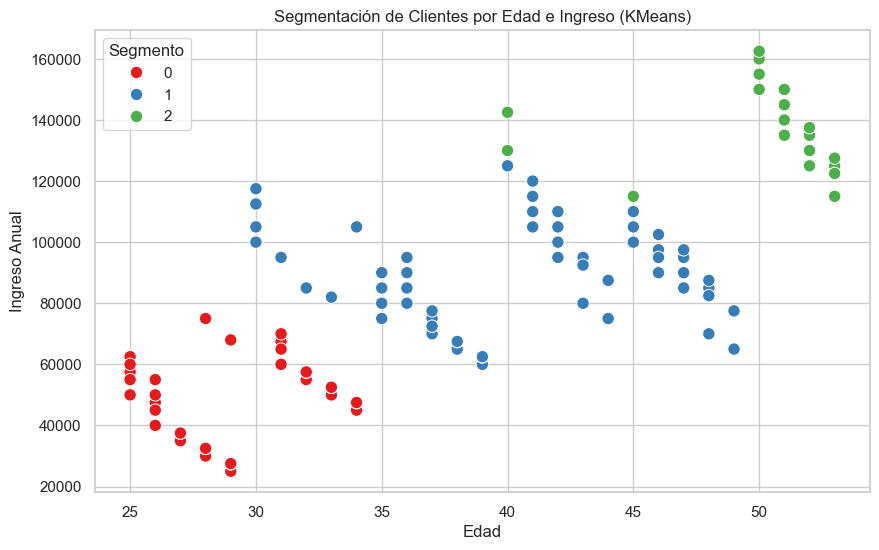

In [15]:
import seaborn as sns

# Visualizamos los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Income', hue='Segment', palette='Set1', s=80)
plt.title('Segmentaci√≥n de Clientes por Edad e Ingreso (KMeans)')
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual')
plt.legend(title='Segmento')
plt.grid(True)
plt.show()


### Descripci√≥n de Segmentos de Clientes

Hemos identificado tres segmentos clave de clientes basados en su edad e ingresos:

* **Segmento 0: J√≥venes con ingresos bajos**
    * Este grupo se caracteriza por clientes de menor edad con niveles de ingresos m√°s bajos. Pueden representar una oportunidad para productos o servicios de entrada al mercado o programas de fidelizaci√≥n a largo plazo.
* **Segmento 1: Adultos con ingresos medios**
    * Este segmento incluye a adultos en edad productiva con ingresos moderados. Son un grupo vers√°til y pueden estar interesados en una amplia gama de productos, desde soluciones para el hogar hasta opciones de ahorro e inversi√≥n.
* **Segmento 2: Clientes mayores con ingresos altos**
    * Este grupo est√° compuesto por clientes de mayor edad que han alcanzado niveles de ingresos elevados. Probablemente buscan productos y servicios premium, inversiones a largo plazo y soluciones personalizadas.

In [16]:
# Estadisticas por segmento
df.groupby('Segment')[['Age', 'Income']].mean()


Age         Income
Segment                          
0        29.000000   48615.384615
1        40.057471   89505.747126
2        49.400000  136900.000000

In [17]:
df.to_csv("clientes_segmentados.csv", index=False)

In [19]:
# Ver valores √∫nicos por columna categ√≥rica (para entender c√≥mo agrupar)
for col in ['Education', 'Marital Status', 'Home Ownership', 'Gender']:
    print(f"{col}: {df[col].unique()}")

# Agrupar por segmento y calcular estad√≠sticas num√©ricas
resumen_numerico = df.groupby('Segment')[['Age', 'Income']].mean().round(2)

# Agrupar por segmento y obtener el valor m√°s frecuente (modo) en columnas categ√≥ricas
resumen_categorico = df.groupby('Segment')[['Education', 'Marital Status', 'Home Ownership', 'Credit Score']].agg(lambda x: x.mode().iloc[0])

# Combinar ambos
resumen_segmentos = pd.concat([resumen_numerico, resumen_categorico], axis=1)

# Mostrar el resumen
print(resumen_segmentos)


Education: ["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]
Marital Status: ['Single' 'Married']
Home Ownership: ['Rented' 'Owned']
Gender: ['Female' 'Male']
           Age     Income            Education Marital Status Home Ownership  \
Segment                                                                        
0        29.00   48615.38   Associate's Degree         Single         Rented   
1        40.06   89505.75      Master's Degree        Married          Owned   
2        49.40  136900.00  High School Diploma        Married          Owned   

        Credit Score  
Segment               
0            Average  
1               High  
2               High  
